In [425]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools
import numpy.ma as ma

In [442]:
sim = rebound.Simulation()
sim.add(m=1,r=0.0046524726)
#sim.add(m=1,r=0.0046524726)
sim.add(m=1e-3,r=0.00046732617)
sim.add(m=1e-6,r=4.2587571e-05)
#sim.add(m=1e-6,r=4.2587571e-05)

In [547]:
def timestep(sim, p1, p2, r):
    t1 = eps*(np.sqrt(r**3/sim.G/p1.m)/dt)**kappa*dt
    t2 = eps*(np.sqrt(r**3/sim.G/p2.m)/dt)**kappa*dt
    return np.min([t1,t2,dt])

In [548]:
def twoBody(sim, p1, p2, r,adaptive=True):
    mu = sim.G*(p1.m+p2.m)
    T = 2*np.pi*np.sqrt(r**3/mu)
    if adaptive:
        _dt = timestep(sim,p1,p2,r)
    else:
        _dt = dt
    return sim.G*p2.m/(p1.m+p2.m)/r *(_dt/T)**2   +1e-16
def threeBody(sim, p1, p2, p3, r, rfar,adaptive=True):
    if adaptive:
        _dt = timestep(sim,p2,p3,rfar)
    else:
        _dt = dt
    return sim.G*(p2.m*p3.m)/r /rfar**3  *_dt**2   +1e-16

In [549]:
Nrs = 100
def initplot():
    fig, axs = plt.subplots(len(sim.particles),len(sim.particles),figsize=(10,8),sharey=True,sharex=True)
    for i in range(sim.N):
        for j in range(sim.N):
            ax = axs[i][j]
            if i==sim.N-1:
                ax.set_xlabel("distance")
                ax.set_xscale("log")
            if j==0:
                ax.set_ylabel("specfific\n (relative)\nenergy error")
                ax.set_yscale("log")    
                ax.set_ylim([1e-16,2])
            if i==j:
                ax.remove()
    return fig, axs


def ploterrors(alpha=1.):
    maxer = np.zeros((Nrs))
    c = ["black","red","blue"]
    rmin = sorted([p.r for p in sim.particles])[1] # second smallest
    rs = np.logspace(np.log10(rmin),0,Nrs)
    for i in range(sim.N):
        for j in range(sim.N):
            ax = axs[i][j]
            if i==j:
                continue
 
            e = [twoBody(sim,sim.particles[i],sim.particles[j],r) for r in rs]
            e = ma.masked_array(e, mask=rs<sim.particles[i].r+sim.particles[j].r)
            ax.plot(rs, e,ls="-",color="black",alpha=alpha)
            maxer = np.maximum(maxer,e.filled(0.))  
            
            for k in range(sim.N):
                if k==i or k==j:
                    continue

                e = [threeBody(sim,sim.particles[i],sim.particles[j],sim.particles[k],r,1.) for r in rs]
                e = ma.masked_array(e, mask=rs<sim.particles[i].r+sim.particles[j].r)
                maxer = np.maximum(maxer,e.filled(0.))    
                ax.plot(rs, e,ls=":",color="black",alpha=alpha)                                       
                
    for i in range(sim.N):
        for j in range(sim.N):
            ax = axs[i][j]
            if i==j:
                continue
            e = ma.masked_array(maxer, mask=rs<sim.particles[i].r+sim.particles[j].r)    
            ax.fill(rs, e,color="orange",alpha=alpha*0.3)

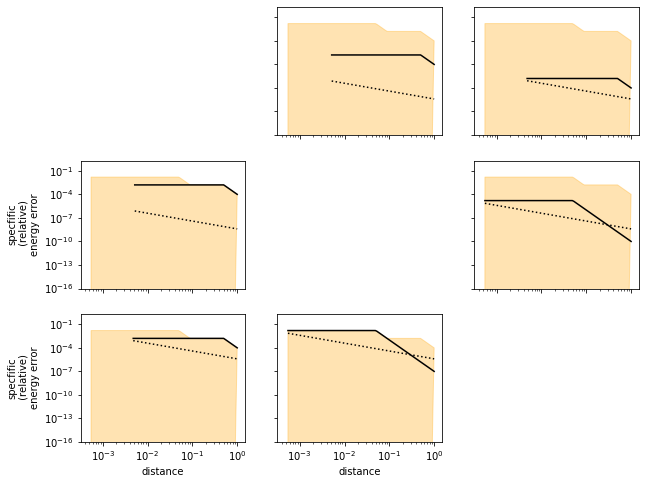

In [550]:
fig,axs = initplot()
dt = 1e-2*2.*np.pi
kappa = 4./3.    
Nex = 1
eps = 0.1
ploterrors()

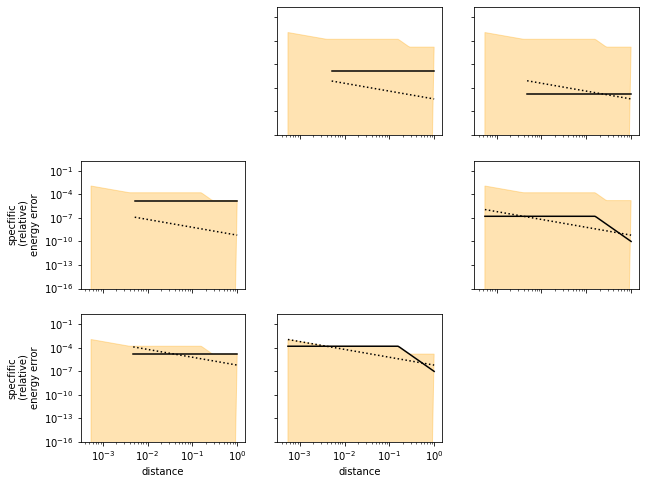

In [551]:
fig,axs = initplot()
dt = 1e-2*2.*np.pi
kappa = 4./3.    
Nex = 1
eps = 0.01
ploterrors()

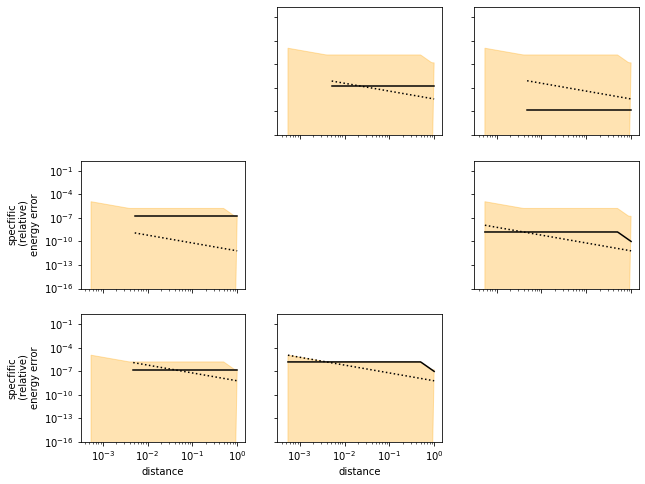

In [552]:
fig,axs = initplot()
dt = 1e-2*2.*np.pi
kappa = 4./3.    
Nex = 1
eps = 0.001
ploterrors()

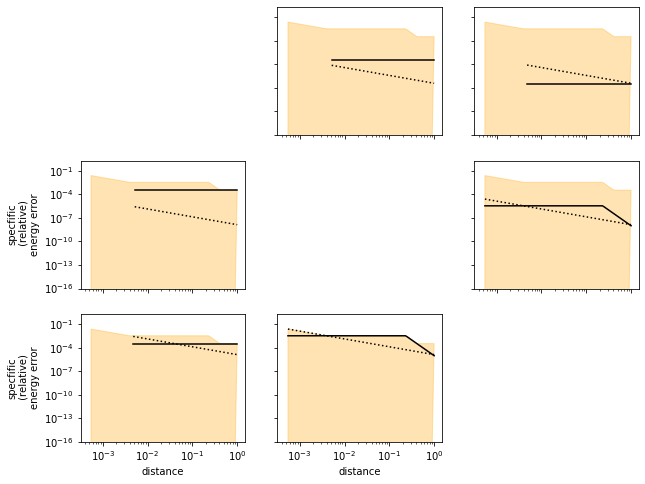

In [553]:
fig,axs = initplot()
dt = 1e-1*2.*np.pi
kappa = 4./3.    
Nex = 1
eps = 0.1
ploterrors()

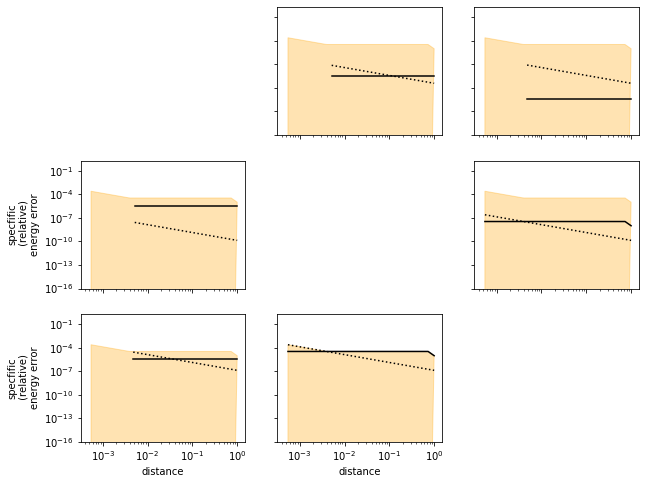

In [554]:
fig,axs = initplot()
dt = 1e-1*2.*np.pi
kappa = 4./3.    
Nex = 1
eps = 0.01
ploterrors()

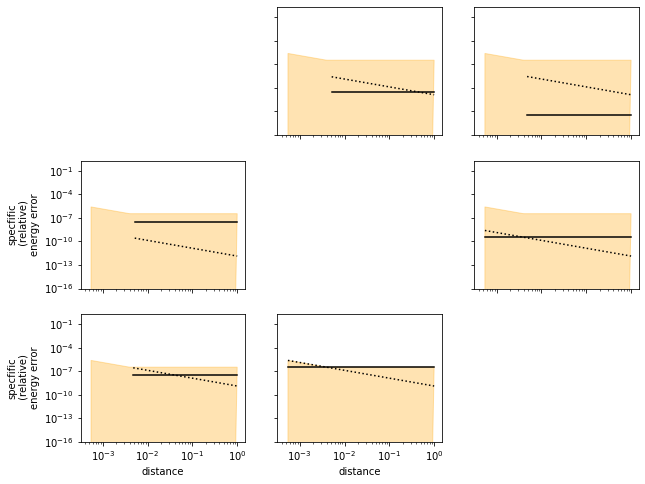

In [555]:
fig,axs = initplot()
dt = 1e-1*2.*np.pi
kappa = 4./3.    
Nex = 1
eps = 0.001
ploterrors()